In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [29]:
df = pd.read_csv('/Users/lama/Desktop/Student_Marks.csv')

<h1> Data Exploration and Visulization </h1>

In [140]:
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [31]:
df.shape

(100, 3)

In [32]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
number_courses    100 non-null int64
time_study        100 non-null float64
Marks             100 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [42]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [34]:
df.max()

number_courses     8.000
time_study         7.957
Marks             55.299
dtype: float64

In [35]:
df.min()

number_courses    3.000
time_study        0.096
Marks             5.609
dtype: float64

In [37]:
Max_Marks_Details = df[df['Marks'] == 55.299]

In [38]:
Max_Marks_Details

,number_courses,time_study,Marks
4,8,7.811,55.299


In [39]:
Min_Marks_Details = df[df['Marks'] == 5.609]

In [40]:
Min_Marks_Details

,number_courses,time_study,Marks
96,3,0.301,5.609


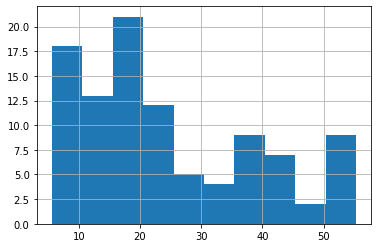

In [23]:
df['Marks'].hist()

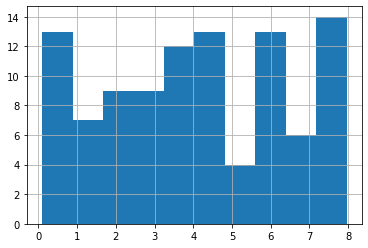

In [24]:
df['time_study'].hist()

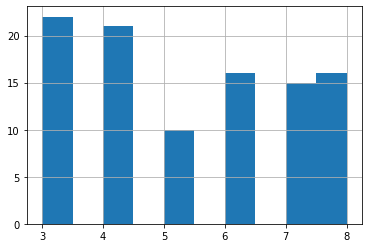

In [25]:
df['number_courses'].hist()

<h1> Methodology </h1>

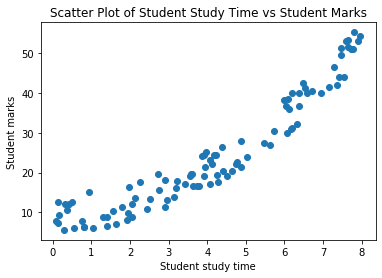

In [45]:
plt.scatter(x = df.time_study, y = df.Marks)
plt.xlabel("Student study time")
plt.ylabel("Student marks")
plt.title("Scatter Plot of Student Study Time vs Student Marks")
plt.show()

In [103]:
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [104]:
df__ = df.copy()

In [105]:
df__

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


Below i will drop number of courses as I will not use it in my prediction because the goal of prediction is to predict the student marks depent of the averate study timee 

In [110]:
new_df = df__.drop('number_courses' , axis=1)

In [111]:
new_df

,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299
...,...,...
95,3.561,19.128
96,0.301,5.609
97,7.163,41.444
98,0.309,12.027


<h1> Data Splitting to split data into a train and test </h1>

In [112]:
X = new_df.drop("Marks", axis = "columns")
y = new_df.drop("time_study", axis = "columns")
print ("Shape of X = ", X.shape)
print ("Shape of y = ", y.shape)

Shape of X =  (100, 1)
Shape of y =  (100, 1)


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=51 )
print ("The shape of X_train = ", X_train.shape)
print ("The shape of y_train = ", y_train.shape)
print ("The shape of X_test = ", X_test.shape)
print ("The shape of y_test = ", y_test.shape)

The shape of X_train =  (80, 1)
The shape of y_train =  (80, 1)
The shape of X_test =  (20, 1)
The shape of y_test =  (20, 1)


<h1> Applying the Linear Regression </h1>

In [114]:
linearrr = LinearRegression()

In [115]:
linearrr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
y_predition = linearrr.predict(X_test)
y_predition

array([[15.85824516],
       [10.58032664],
       [ 4.35227296],
       [19.58738841],
       [42.95082791],
       [23.87123486],
       [45.72983599],
       [44.92798781],
       [ 6.4502593 ],
       [ 6.43927507],
       [27.47405957],
       [12.76069465],
       [22.88265491],
       [24.99711759],
       [43.99432897],
       [19.23589332],
       [28.27590775],
       [24.71152782],
       [26.78754572],
       [41.36909999]])

In [121]:
pd.DataFrame( np.c_[X_test,y_test,y_predition], columns = ["time_study","the original marks","Predicted marks"] )

,time_study,the original marks,Predicted marks
0,2.518,13.416,15.858245
1,1.557,10.429,10.580327
2,0.423,12.132,4.352273
3,3.197,16.106,19.587388
4,7.451,49.544,42.950828
5,3.977,25.133,23.871235
6,7.957,54.321,45.729836
7,7.811,55.299,44.927988
8,0.805,6.349,6.450259
9,0.803,6.217,6.439275


<h1> The accuracy of the model </h1>

In [122]:
linearrr.score(X_test,y_test)

0.8826200571575015

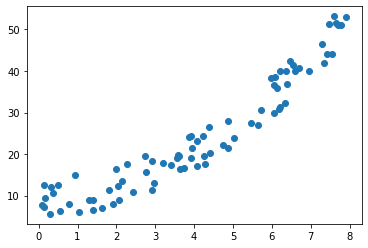

In [123]:
plt.scatter(X_train,y_train)

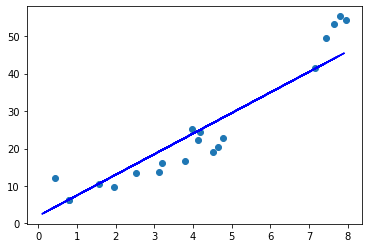

In [124]:
plt.scatter(X_test,y_test)
plt.plot(X_train, linearrr.predict(X_train), color = "b" )

<h1> Model Evaluation </h1> 

<h1> Mean Absolute Error(MAE) </h1>

In [138]:

from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_predition))

#MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

MAE 4.421265372087189


<h1> R Squared (R2) </h1>

In [135]:
#R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.
r2 = r2_score(y_test,y_predition)

In [136]:
r2

0.8826200571575015

Result: the model is capable to explain 88% of the variance of data.